In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
%matplotlib inline

In [2]:
df=pd.read_excel("D:\\Project\\Jagtial.xlsx")#importing dataset

In [3]:
df.head()

,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,2018-01-01,0.0,13.7,31.2,32.4,68.3,0.0,5.8
1,2018-01-02,0.0,13.0,33.9,22.0,58.0,0.0,11.4
2,2018-01-03,0.0,18.6,38.0,15.8,54.0,0.0,5.5
3,2018-01-04,0.0,26.3,41.8,7.6,81.4,0.0,10.5
4,2018-01-05,0.0,28.5,43.5,13.7,63.8,0.0,11.4


In [4]:
f_col=df.pop('rain')

In [5]:
df.insert(1,'rain',f_col)#shifting the position of 'predicted column to first possition'

In [6]:
df.head(5)

,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,2018-01-01,0.0,13.7,31.2,32.4,68.3,0.0,5.8
1,2018-01-02,0.0,13.0,33.9,22.0,58.0,0.0,11.4
2,2018-01-03,0.0,18.6,38.0,15.8,54.0,0.0,5.5
3,2018-01-04,0.0,26.3,41.8,7.6,81.4,0.0,10.5
4,2018-01-05,0.0,28.5,43.5,13.7,63.8,0.0,11.4


In [7]:
# Selecting features
cols = list(df)[1:]

# Extracting dates
datelist = list(df['date'])

In [8]:
print(f'Training set shape == {df.shape}')
print(f'All timestamps == {len(df)}')
print(f'Featured selected: {cols}')

Training set shape == (1734, 8)
All timestamps == 1734
Featured selected: ['rain', 'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_max', 'wind_speed_min']


In [9]:
df = df[cols].astype(str)
df = df.astype(float)
training_set = df.values
print(f'Shape of training set == {training_set.shape}')

Shape of training set == (1734, 7)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.28594945],
       [-0.28594945],
       [-0.28594945],
       ...,
       [-0.28594945],
       [-0.28594945],
       [ 2.32221799]])

In [11]:
x_train = []
y_train = []

n_future = 365   # Number of days we want top predict into the future
n_past = 550     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    x_train.append(training_set_scaled[i - n_past:i, 0:df.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

print(f'X_train shape == {x_train.shape}')
print(f'y_train shape == {y_train.shape}')

X_train shape == (820, 550, 6)
y_train shape == (820, 1)


In [12]:
# Import Libraries and packages from Keras to create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [13]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, df.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [14]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 1.0086
Epoch 1: val_loss improved from inf to 3.80139, saving model to weights.h5
3/3 [==============================] - 30s 6s/step - loss: 1.0086 - val_loss: 3.8014 - lr: 0.0100
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 0.8113
Epoch 2: val_loss did not improve from 3.80139
3/3 [==============================] - 12s 4s/step - loss: 0.8113 - val_loss: 4.1749 - lr: 0.0100
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 0.8057
Epoch 3: val_loss did not improve from 3.80139
3/3 [==============================] - 10s 3s/step - loss: 0.8057 - val_loss: 4.0321 - lr: 0.0100
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 0.7693
Epoch 4: val_loss did not improve from 3.80139
3/3 [==============================] - 10s 3s/step - loss: 0.7693 - val_loss: 3.9127 - lr: 0.0100
Epoch 5/30
3/3 [==============================] - ETA: 0s - loss: 0.7712
Epoch 5: val_loss did not i

In [15]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist[-1], periods=n_future, freq='1d').tolist()

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [16]:
# Performing predictions
predictions_future = model.predict(x_train[-n_future:])

predictions_train = model.predict(x_train[n_past:])

9/9 [==============================] - 3s 296ms/step


In [17]:
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')

In [18]:
y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['rain']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['rain']).set_index(pd.Series(datelist[2 *n_past +n_future -1:]))

In [19]:
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN

,rain
2022-01-04,0.455473
2022-01-05,0.474298
2022-01-06,0.455246
2022-01-07,0.354232
2022-01-08,0.333175
...,...
2022-09-26,0.524575
2022-09-27,0.390426
2022-09-28,-0.137881
2022-09-29,0.240396


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
np.sqrt(mean_squared_error(df['rain'][1464:],PREDICTION_TRAIN))

19.548901328167833

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(df['rain'][1464:],PREDICTION_TRAIN)

7.782235527717404

In [24]:
PREDICTIONS_FUTURE

,rain
2022-09-30,3.188919
2022-10-01,2.919829
2022-10-02,2.340712
2022-10-03,1.749967
2022-10-04,1.144010
...,...
2023-09-25,0.524575
2023-09-26,0.390426
2023-09-27,-0.137881
2023-09-28,0.240396


In [25]:
PREDICTIONS_FUTURE.to_excel("D:\\Project\\predicted\\JagtialRain.xlsx")

In [26]:
df.index=datelist

In [27]:
df.head()

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
2018-01-01,0.0,13.7,31.2,32.4,68.3,0.0,5.8
2018-01-02,0.0,13.0,33.9,22.0,58.0,0.0,11.4
2018-01-03,0.0,18.6,38.0,15.8,54.0,0.0,5.5
2018-01-04,0.0,26.3,41.8,7.6,81.4,0.0,10.5
2018-01-05,0.0,28.5,43.5,13.7,63.8,0.0,11.4


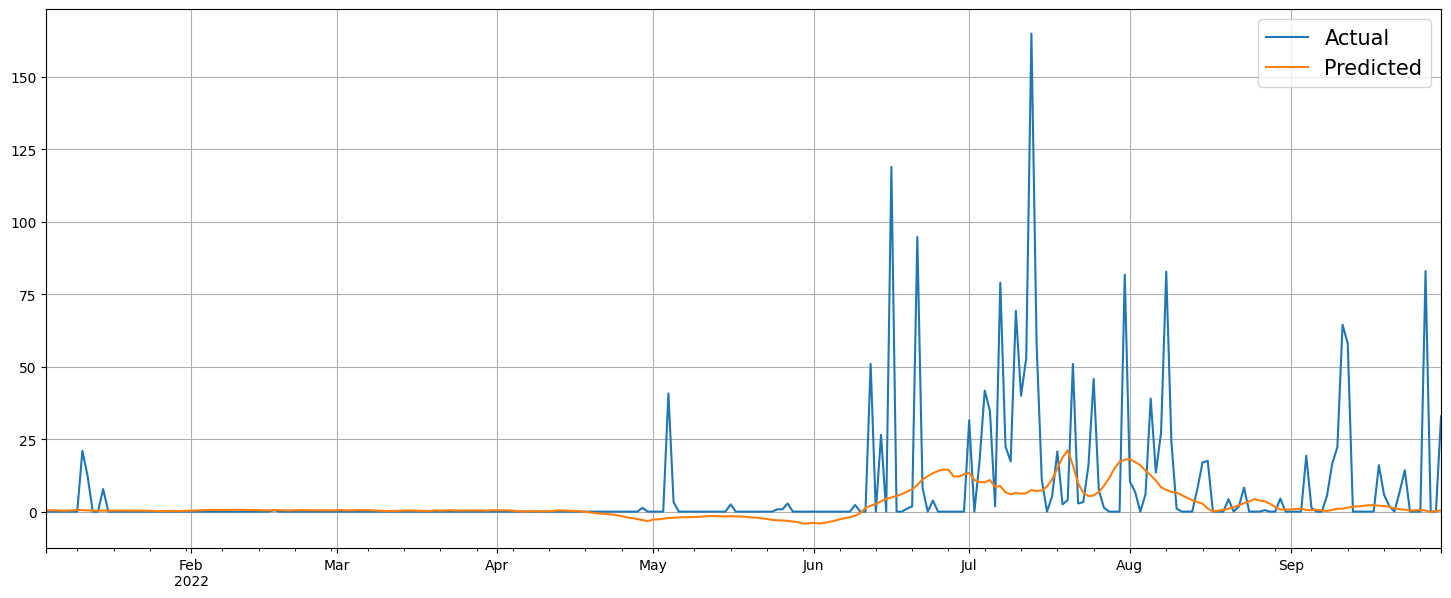

In [28]:
ax=df['rain']["2022-01-04":"2022-09-30"].plot(figsize=(18,7))
PREDICTION_TRAIN.plot(ax=ax)
plt.legend(['Actual','Predicted'],prop={'size':15})
plt.grid()
plt.show()

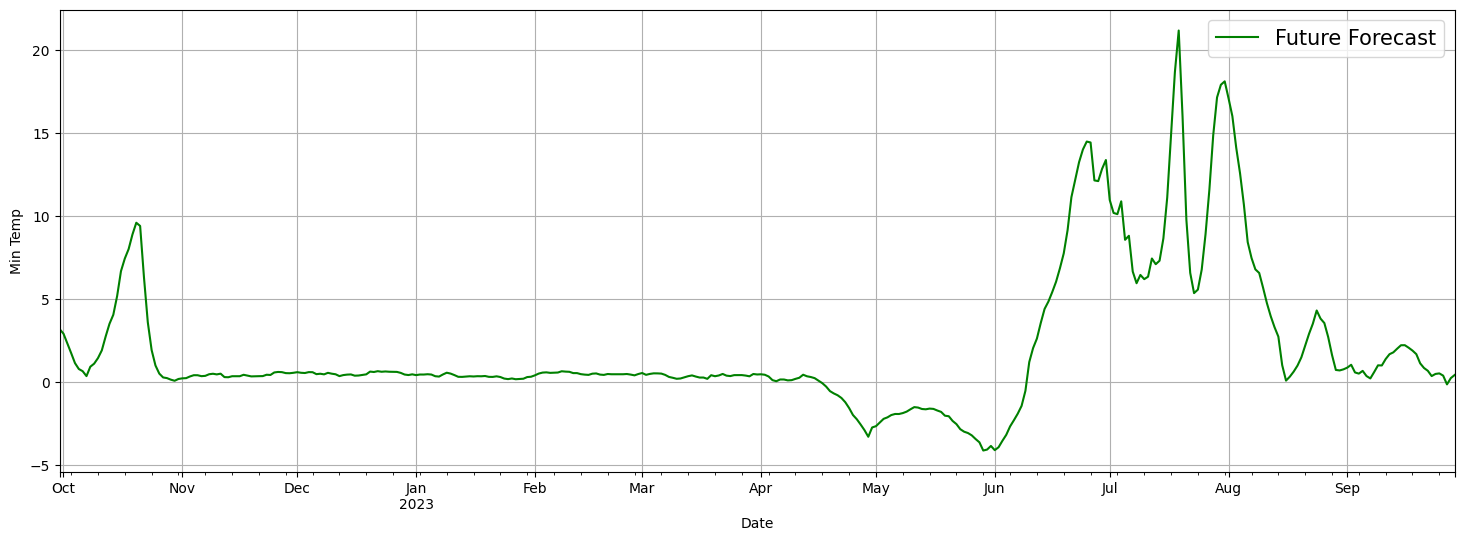

In [29]:
PREDICTIONS_FUTURE.plot(color='green',figsize=(18,6))
plt.xlabel("Date")
plt.ylabel("Min Temp")
plt.legend(['Future Forecast'],prop={'size':15})
plt.grid()
plt.show()

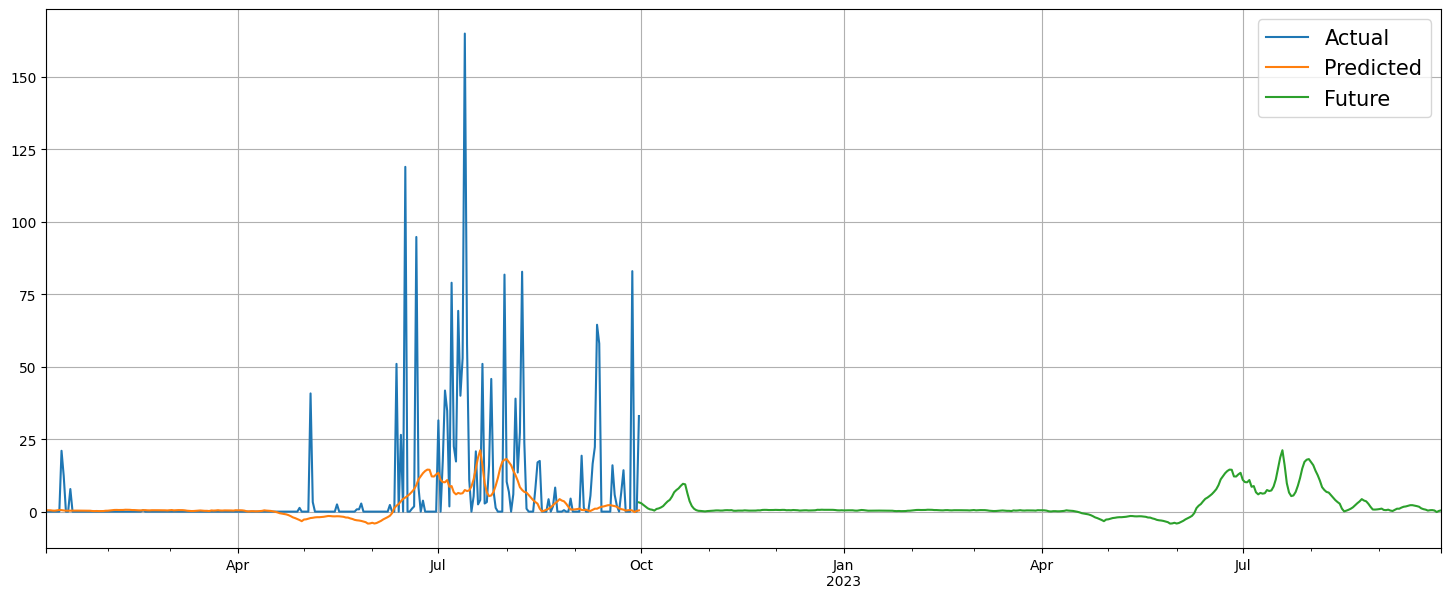

In [30]:
ax=df['rain']["2022-01-04":"2022-09-30"].plot(figsize=(18,7))
PREDICTION_TRAIN.plot(ax=ax)
PREDICTIONS_FUTURE.plot(ax=ax)
plt.legend(['Actual','Predicted','Future'],prop={'size':15})
plt.grid()
plt.show()